In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'E:\1.My_Folder\codebasics data\data\HR_analytics.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='salary'>

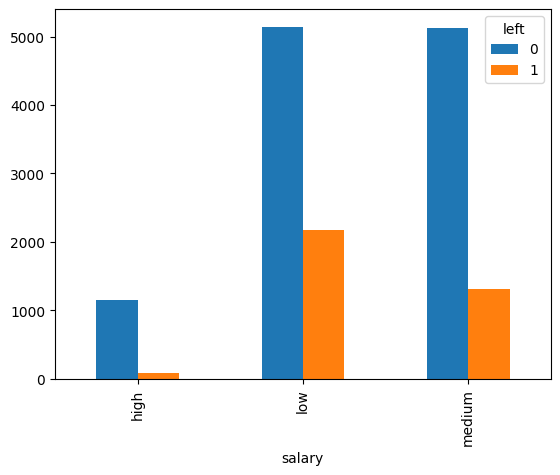

In [3]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

<Axes: xlabel='Department'>

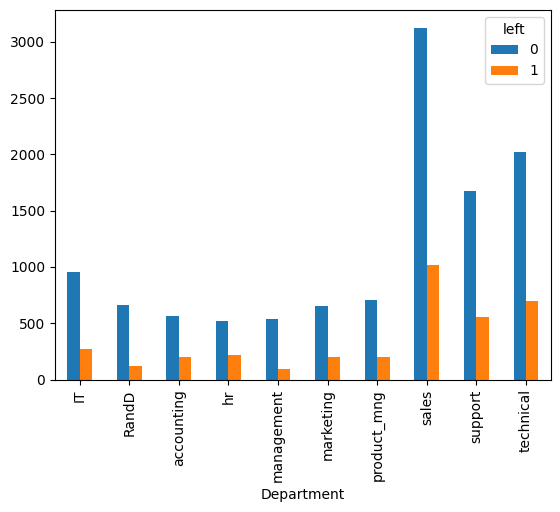

In [4]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

In [5]:
new_df = df.drop(['Department', 'salary'], axis = 1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
new_df.groupby(df.left).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


<Axes: xlabel='promotion_last_5years'>

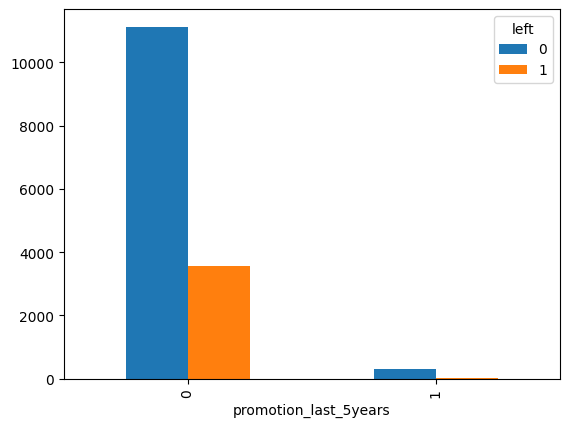

In [7]:
pd.crosstab(df.promotion_last_5years, df.left).plot(kind='bar')

In [8]:
subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [9]:
salary_dummies = pd.get_dummies(subdf.salary, prefix= 'salary')
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [10]:
df_with_dummies = pd.concat([subdf, salary_dummies], axis=1)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [11]:
X = df_with_dummies

In [12]:
X.drop('salary', axis=1, inplace= True)
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [13]:
y = df.left

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3)

In [15]:
from sklearn.linear_model import LogisticRegression 
logistic_regression = LogisticRegression(max_iter=1000) 
model = LogisticRegression()

In [16]:
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
model.score(X_test, y_test)

0.7817142857142857